In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold
def train_and_test(df):
    train=df[:1460]
    test=df[1460:]
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    ndf=train.select_dtypes(include=numerics)
    ndf=ndf.drop(['SalePrice'],axis=1)
    dic={}
    for col in ndf.columns:
        lr=LinearRegression()
        lr.fit(ndf[col].reshape(-1, 1),train['SalePrice'])
        tdf=test.select_dtypes(include=numerics)
        tdf=tdf.drop(['SalePrice'],axis=1)
        predictions=lr.predict(tdf[col].reshape(-1, 1))
        rms = sqrt(mean_squared_error(test['SalePrice'], predictions))
        dic[col]=rms
    return dic
df=pd.read_csv("AmesHousing.tsv",delimiter="\t")
ndf=df.select_dtypes(include=['int','float']).fillna(df.mean())
d=train_and_test(ndf)
import operator
sorted(d.items(), key=operator.itemgetter(1))

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


[('Overall Qual', 49492.23698000454),
 ('Gr Liv Area', 57088.25161263909),
 ('Garage Cars', 63009.90693123263),
 ('Garage Area', 63926.38919810563),
 ('1st Flr SF', 66145.85396434217),
 ('Total Bsmt SF', 66495.37509929673),
 ('Full Bath', 66967.82905766825),
 ('Year Built', 69220.60962857505),
 ('Year Remod/Add', 69471.5754945993),
 ('TotRms AbvGrd', 70188.0119316708),
 ('Mas Vnr Area', 70683.12479163056),
 ('Garage Yr Blt', 71545.78552263608),
 ('Fireplaces', 72074.62660487094),
 ('Wood Deck SF', 76680.25475889367),
 ('Lot Frontage', 76745.85039159581),
 ('BsmtFin SF 1', 77042.77499513769),
 ('2nd Flr SF', 77495.6615651655),
 ('Half Bath', 77771.18296845852),
 ('Open Porch SF', 78215.43997290742),
 ('Lot Area', 78657.78198170225),
 ('Bsmt Full Bath', 79192.89806768319),
 ('PID', 79227.94967039453),
 ('Bsmt Unf SF', 79660.16243213987),
 ('Bedroom AbvGr', 80290.22597377666),
 ('Screen Porch', 80783.10473059681),
 ('Kitchen AbvGr', 80881.97969320723),
 ('Overall Cond', 80930.27473175504)

In [204]:
#Checking rms for some of the features
def train_and_test(df):
    df=df.fillna(df.mean())
    train=df[:1460]
    test=df[1460:]
    lr=LinearRegression()
    features=['Overall Qual','Gr Liv Area','Garage Cars']
    lr.fit(train[features],train['SalePrice'])
    predictions=lr.predict(test[features])
    rms = sqrt(mean_squared_error(test['SalePrice'], predictions))
    return rms
train_and_test(df[['Overall Qual','Gr Liv Area','Garage Cars','SalePrice']])

40869.979671873436

In [205]:


num_cols=list(df.isnull().sum()[df.isnull().sum()<147].index)
num_cols=df[num_cols].select_dtypes(include=['int','float']).columns
df[num_cols]=df[num_cols].fillna(df.mean())

#drop text columns with more than zero empty values
rows=df.shape[0]
txt_cols=df.select_dtypes(include=['object']).isnull().sum()
drop_txt_cols=txt_cols[txt_cols>0]
df=df.drop(drop_txt_cols.index,axis=1)
df.columns

#drop numerical columns with more than 5% of empty values
lim=rows/20
num_cols=df.select_dtypes(include=['int','float']).isnull().sum()
drop_num_cols=num_cols[num_cols>lim]
df=df.drop(drop_num_cols.index,axis=1)
years_sold = df['Yr Sold'] - df['Year Built']
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod
df=df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis=1)
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Sale Type', 'Sale Condition', 'SalePrice',
       'Years 

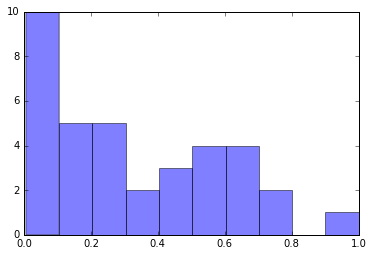

In [206]:
#let us drop numerical columns that are not correlated with SalePrice
num_df=df.select_dtypes(include=['int','float'])
corr_mat=num_df.corr()
sale_price_corr=corr_mat["SalePrice"]

drop_num_cols=list(sale_price_corr[abs(sale_price_corr)<0.28].index)
df=df.drop(drop_num_cols,axis=1)
%matplotlib inline
plt.hist(abs(sale_price_corr),10,alpha=0.5)
plt.show()

In [207]:
#Print number of categorical values present in each categorical column
string_cols=df.select_dtypes(include=['object'])
for col in string_cols.columns:
    print(col," ",len(string_cols[col].value_counts()))

MS Zoning   7
Street   2
Lot Shape   4
Land Contour   4
Utilities   3
Lot Config   5
Land Slope   3
Neighborhood   28
Condition 1   9
Condition 2   8
Bldg Type   5
House Style   8
Roof Style   6
Roof Matl   8
Exterior 1st   16
Exterior 2nd   17
Exter Qual   4
Exter Cond   5
Foundation   6
Heating   6
Heating QC   5
Central Air   2
Kitchen Qual   5
Functional   8
Paved Drive   3
Sale Type   10
Sale Condition   6


In [208]:
#Dropping columns with more than 10 categorical values
drop_str_cols=list()
for col in string_cols.columns:
    if len(string_cols[col].value_counts())>10:
       drop_str_cols.append(col)
df=df.drop(drop_str_cols,axis=1)

In [209]:
#Using dummy coding
str_cols=df.select_dtypes(include=['object']).columns
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].astype('category')
df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
df=df.drop(str_cols,axis=1)

corr_mat=df.corr()
sale_price_corr=corr_mat["SalePrice"]
print(abs(sale_price_corr))
drop_num_cols=list(sale_price_corr[abs(sale_price_corr)<0.1].index)
df=df.drop(drop_num_cols,axis=1)

Overall Qual              0.799262
Mas Vnr Area              0.505784
BsmtFin SF 1              0.432794
Total Bsmt SF             0.632105
1st Flr SF                0.621676
Gr Liv Area               0.706780
Full Bath                 0.545604
Half Bath                 0.285056
TotRms AbvGrd             0.495474
Fireplaces                0.474558
Garage Cars               0.647861
Garage Area               0.640385
Wood Deck SF              0.327143
Open Porch SF             0.312951
SalePrice                 1.000000
Years Before Sale         0.558907
Years Since Remod         0.534940
MS Zoning_A (agr)         0.043682
MS Zoning_C (all)         0.117307
MS Zoning_FV              0.106706
MS Zoning_I (all)         0.032879
MS Zoning_RH              0.053581
MS Zoning_RL              0.244217
MS Zoning_RM              0.292590
Street_Grvl               0.059519
Street_Pave               0.059519
Lot Shape_IR1             0.267209
Lot Shape_IR2             0.099685
Lot Shape_IR3       

In [210]:
#Columns left
df.columns

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'Years Before Sale', 'Years Since Remod',
       'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_RL', 'MS Zoning_RM',
       'Lot Shape_IR1', 'Lot Shape_Reg', 'Land Contour_HLS',
       'Lot Config_CulDSac', 'Condition 1_Artery', 'Condition 1_Feedr',
       'Condition 1_Norm', 'Condition 2_PosA', 'Bldg Type_1Fam',
       'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'House Style_1.5Fin', 'House Style_2Story', 'Roof Style_Gable',
       'Roof Style_Hip', 'Roof Matl_WdShngl', 'Exter Qual_Ex', 'Exter Qual_Fa',
       'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Cond_Fa', 'Exter Cond_TA',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Heating QC_Ex', 'Heating QC_Fa', 'Heating

In [211]:
#Calculate rms value for 4 folds in cross validation
lr=LinearRegression()
kf = KFold(n_splits=4, shuffle=True)

rmse_values = []
features=df.columns
features=features.drop("SalePrice")
for train_index, test_index, in kf.split(df):
    train = df.iloc[train_index]
    test = df.iloc[test_index]
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    rmse_values.append(rmse)
rmse_values

[27642.64541039454, 33163.658588584454, 33972.855368775723, 28294.473928218973]